# Лабораторная работа № 3
## Методы спуска

### Функции построения графиков

In [ ]:
def constStepDescentBuilder(f, a, e):
    counter = 0
    isWorking = True
    f_a = f(a)
    orig_h = h = D(5)
    vertex = [[], []]
    while isWorking:
        grad = -getGrad(f, a)
        if (counter + 1) % 10 == 0:
            h = orig_h
        b = a + grad * h
        f_b = f(b)
        while f_b > f_a:
            h /= D(2)
            b = a + grad * h
            f_b = f(b)
        updateVertex(vertex, b, a)
        delta = getDelta(b, a)
        if sqrt(delta) < e and math.fabs(f(b) - f(a)) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b
        counter += 1
    return vertex

def splitStepDescentBuilder(f, a, e):
    isWorking = True
    f_a = f(a)
    orig_h = h = D(25)
    vertex = [[], []]
    while isWorking:
        grad = -getGrad(f, a)
        b = a + grad * h
        f_b = f(b)
        h = orig_h
        while f_a - f_b < sqGrad(f, a) * h * D(0.5):
            h /= D(2)
            b = a + grad * h
            f_b = f(b)
        updateVertex(vertex, b, a)
        delta = getDelta(b, a)
        if sqrt(delta) < e and math.fabs(f(b) - f(a)) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b
    return vertex


def steepestDescentGoldenBuilder(f, a, e):
    isWorking = True
    b = a.copy()
    f_a = f(a)
    vertex = [[], []]
    while isWorking:
        grad = getGrad(f, a)
        inner_f = lambda x: f(a - grad * x)
        b = a - grad * golden_ratio(inner_f, D(0), D(1e5), e)
        f_b = f(b)
        updateVertex(vertex, b, a)
        delta = sqrt(getDelta(b, a))
        if delta < e and math.fabs(f_b - f_a) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b
    return vertex

def conjugateGradientBuilder(f, a, e):
    isWorking = True
    counter = 0
    p = -getGrad(f, a)
    grad = p
    f_a = f(a)
    vertex = [[], []]
    while isWorking:
        counter += 1
        inner_f = lambda x: f(a + p * x)
        b = a + p * golden_ratio(inner_f, D(0), D(1e5), e)
        f_b = f(b)
        updateVertex(vertex, b, a)
        delta = sqrt(getDelta(b, a))
        if delta < e and math.fabs(f_b - f_a) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b

        grad1 = -getGrad(f, a)
        if counter % 2 == 0:
            beta = 0
        else:
            beta = inner(grad1, grad1) / inner(grad, grad)
        p = grad1 + beta * p
        grad = grad1.copy()
    return vertex

In [ ]:
def getData(f):
    x = np.arange(-40, 40, 0.5)
    y = np.arange(-40, 40, 0.5)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = f([xgrid, ygrid])
    return xgrid, ygrid, zgrid


def init(f):
    x, y, z = getData(f)
    matplotlib.pyplot.ion()
    fig, ax = matplotlib.pyplot.subplots()
    ax.contourf(x, y, z, levels=50)
    ax.axis([-40, 40, -40, 40])
    ax.set_ylabel('y', fontsize=15)
    ax.set_xlabel('x', fontsize=15)
    return (ax, fig)


def buildGraph(f, builder):
    ax, fig = init(f)
    start = np.array([D(-38), D(20)])
    arr = builder(f, start, D(0.001))
    ax.plot(arr[0], arr[1], c='orange')
    matplotlib.pyplot.ioff()
    matplotlib.pyplot.show()

### Вспомогательные функциии

In [ ]:
def getDelta(a, b):
    delta = 0
    for (lh, rh) in zip(a, b):
        delta += (lh - rh)**2
    return delta


def FirstOrderEquasion(f, a, i):
    d = D(0.00000001)
    c = a.copy()
    c[i] += d
    return (f(c) - f(a))/d


def SecondOrderEquasion(f, a, i):
    d = D(0.000000001)
    c = a.copy()
    c[i] += d
    x1 = D(f(c))
    c[i] -= 2*d
    x2 = D(f(c))
    c[i] += d
    x3 = D(f(c))
    return (x1 - 2*x3 + x2)/(d**2)


def inner(a, b):
    sum = D(0)
    for (x, y) in zip(a, b):
        sum += x * y
    return sum


def sqGrad(f, a):
    sum = D(0)
    for i in range(len(a)):
        sum += FirstOrderEquasion(f, a, i)**2
    return sum


def getGrad(f, a):
    argsPD = a.copy()
    for i in range(len(argsPD)):
        argsPD[i] = FirstOrderEquasion(f, argsPD, i)
    return argsPD


def goldenSectionForSteepestDescent(f, a, b, e):
    x1 = a + (b - a) * decimal.Decimal(0.381966)
    x2 = a + (b - a) * decimal.Decimal(0.618034)
    f1 = f(x1)
    f2 = f(x2)
    delta = getDelta(a, b)
    while sqrt(delta) > e:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (b - a) * decimal.Decimal(0.381966)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b - a) * decimal.Decimal(0.618034)
            f2 = f(x2)
        delta = getDelta(a, b)
    return (a + b) / D(2)


def goldenSectionForConjugateGradient(f, a, b, eps):
    a1 = D(0)
    b1 = D(1e5)
    x0 = a1 + D(0.5) * (D(3) - D(math.sqrt(5))) * (b1 - a1)
    x1 = b1 - x0 + a1
    while math.fabs(b1 - a1) > D(eps):
        l = a + x0 * b
        r = a + x1 * b
        if f(l) < f(r):
            b1 = x1
        else:
            a1 = x0
        x1 = x0
        x0 = b1 + a1 - x1
    return (a1 + b1)/D(2)


def findM(f, a1, b1, e):
    a = D(-1e3)
    b = D(1e3)
    while math.fabs(b - a) > e:
        y1 = f(a1 + a * b1)
        y2 = f(a1 + b * b1)
        c = (a + b) / 2
        if y1 < y2:
            b = c
        else:
            a = c
    return (a + b) / 2


def updateVertex(vertex, a, b):
    vertex[0].append(b[0])
    vertex[0].append(a[0])
    vertex[1].append(b[1])
    vertex[1].append(a[1])


def D(x):
    return decimal.Decimal(x)

### Цели работы:


In [ ]:
from sympy import *
import math
import decimal
import numpy as np
import matplotlib.pyplot

In [ ]:
def f(a): return (a[0]**2)/15 + a[1]**2
def f1(a): return (a[0]**2)/10 + 3*a[1]**2

start = np.array([D(-38), D(20)])

###Методы градиентного спуска
Методы градиентного спуска:
На каждом шаге берется направление антиградиента в точке и выбирается величина шага в данном направлении. Повторяется до достижения точности.

#### Метод постоянной величины шага:

In [ ]:
def constStepDescent(f, a, e):
    counter = 0
    isWorking = True
    f_a = f(a)
    orig_h = h = D(5)
    while isWorking:
        grad = -getGrad(f, a)
        if (counter + 1) % 10 == 0:
            h = orig_h
        b = a + grad * h
        f_b = f(b)
        while f_b > f_a:
            h /= D(2)
            b = a + grad * h
            f_b = f(b)
        delta = getDelta(b, a)
        if sqrt(delta) < e and math.fabs(f(b) - f(a)) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b
        counter += 1
    print(a, f_a, "const step")
    return counter

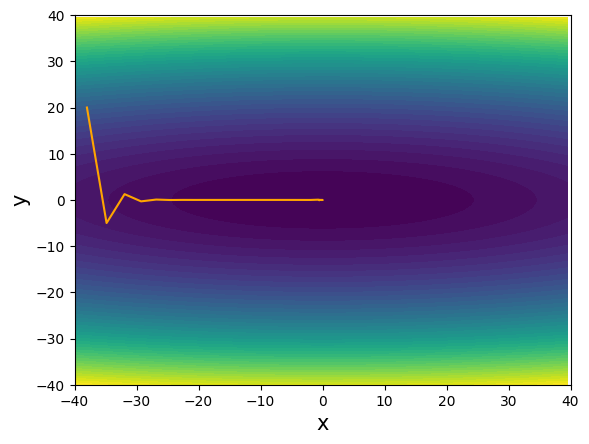

[Decimal('-0.0004349197663873331295270123771')
 Decimal('-0.0000734126837899721315647325530')] 1.799976902087393192190789714E-8 const step
33
[Decimal('-0.009215629942807436312790079036')
 Decimal('-0.0003335386525816746292822134679')] 0.000008826527622574896332081832694 const step
121


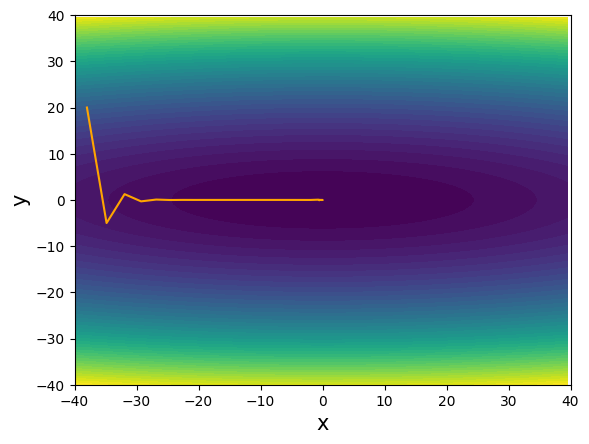

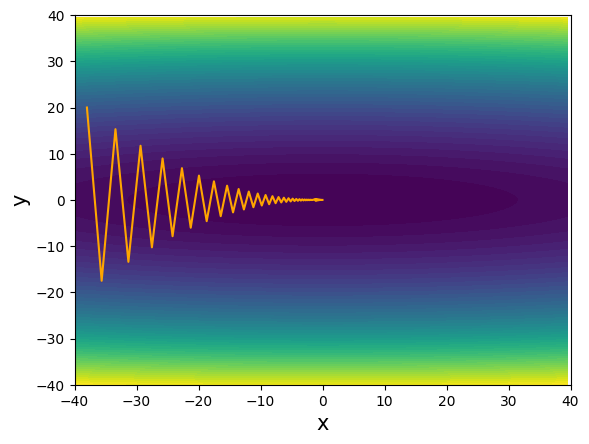

In [ ]:
buildGraph(f, constStepDescentBuilder)
print(constStepDescent(f, start, D(0.001)))
print(constStepDescent(f1, start, D(0.001)))
buildGraph(f, constStepDescentBuilder)
buildGraph(f1, constStepDescentBuilder)

Описание алгоритма:
После определения направления с помощью градиента, мы рассчитываем значение функции в точке, взятой на расстоянии некоторого изначально заданного шага в данном направлении. Если функция в этой точке возрастает быстрее, чем в начальной, сокращаем шаг в два раза, пока не будет иначе. Данный шаг оставляем для следующей итерации. Раз в некоторое количество шагов возвращаем величину шага к начальной, чтобы шаг не стал слишком маленьким.

#### Метод дробления шага (условие Армихо):

Правило Армихо - адаптивный метод поиска величины шага расчета, которое говорит о том, что функция $f(X_k+-\lambda g(X_k))$ не должна превышать значения некоторой убывающей линейной функции равной $f(X_k)$ в нуле:

$f(X_k+-\lambda g(X_k)) << f(X_k)+-\sigma \lambda \nabla f_k g(X_k)$

где коэффициент $\sigma \in (0,\ 1)$, а шаг расчёта $\lambda$ определяется итеративно путём умножения первоначального шага $\lambda_0$ на коэффициент $\beta \in (0,\ 1)$ до тех пор пока не будет выполняться условие.

In [ ]:
def splitStepDescent(f, a, e):
    counter = 0
    isWorking = True
    f_a = f(a)
    orig_h = h = D(25)
    while isWorking:
        grad = -getGrad(f, a)
        b = a + grad * h
        f_b = f(b)
        h = orig_h
        while f_a - f_b < sqGrad(f, a) * h * D(0.5):
            h /= D(2)
            b = a + grad * h
            f_b = f(b)
        delta = getDelta(b, a)
        if sqrt(delta) < e and math.fabs(f(b) - f(a)) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b
        counter += 1
    print(a, f_a, "split step")
    return counter

splitStep
[Decimal('-0.007018187189337390262977532217')
 Decimal('0.0001856617171032544892845659630')] 0.000003318133701503026084798279219 split step
53
[Decimal('-0.01600520735335365327497512089')
 Decimal('0.0005516274925202709964009333770')] 0.00002652954491389719036256334738 split step
57


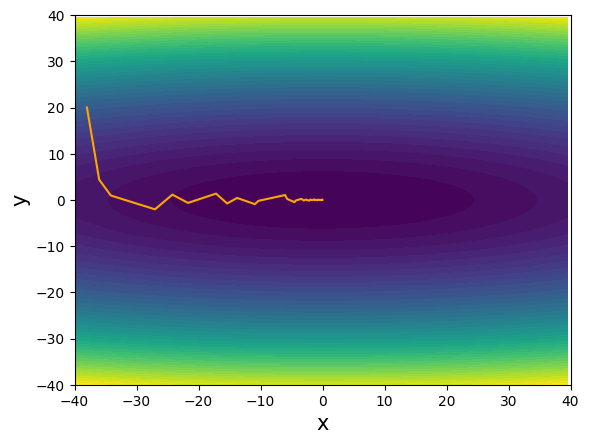

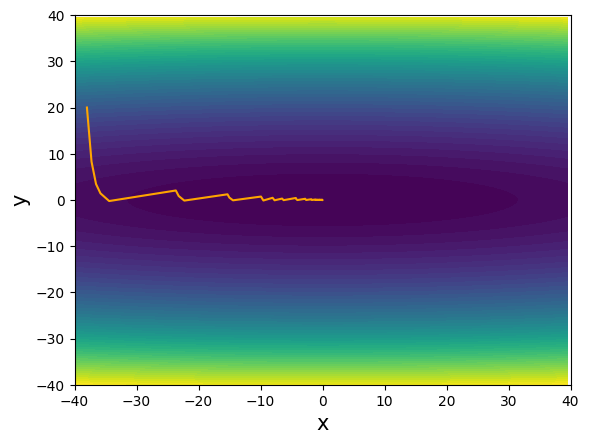

In [ ]:
print("splitStep")
print(splitStepDescent(f, start, D(0.001)))
print(splitStepDescent(f1, start, D(0.001)))
buildGraph(f, splitStepDescentBuilder)
buildGraph(f1, splitStepDescentBuilder)

Описание алгоритма: Каждую итерацию мы начинаем с максимальной длины шага, и будем дробить его, пока не будет выполняться условие $ \mathcal{E} \alpha_k |f' (x_k)|^2 \leq f(x_k) - f(x_k - \alpha_k\ f(x_k)) $

#### Метод наискорейшего спуска (метод золотого сечения)

In [ ]:
def steepestDescentGolden(f, a, e):
    counter = 0
    isWorking = True
    b = a.copy()
    f_a = f(a)
    while isWorking:
        grad = getGrad(f, a)
        inner_f = lambda x: f(a - grad * x)
        b = a - grad * golden_ratio(inner_f, D(0), D(1e5), e)
        f_b = f(b)
        delta = sqrt(getDelta(b, a))
        if delta < e and math.fabs(f_b - f_a) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b
        counter += 1
    print(a, f_a, " golden")
    return counter

In [ ]:
def golden_ratio(func, a, b, e):
    ratio = D(((3 - math.sqrt(5)) / 2))
    l, r = a, b
    prev = func(l + (r - l) * ratio)
    prev_left = True
    n = 1
    while r - l > e:
        x1 = l + (r - l) * ratio
        x2 = r - (r - l) * ratio
        if prev_left:
            f1 = prev
            f2 = func(x2)
        else:
            f1 = func(x1)
            f2 = prev
        n += 1
        if f1 < f2:
            r = x2
            prev = f1
            prev_left = False
        else:
            l = x1
            prev = f2
            prev_left = True
    #print("Golden ratio function calculations: ", n)
    return (l + r) / 2

steepestDescentGolden
[Decimal('-0.0008967373432430772388734849139')
 Decimal('-0.0000077214745320290728773651944')] 5.366881202005894183808542171E-8  golden
13
[Decimal('-0.001328957678086027416832844899')
 Decimal('-0.0000021223804971348968028004103')] 1.766263645113043833395304880E-7  golden
9


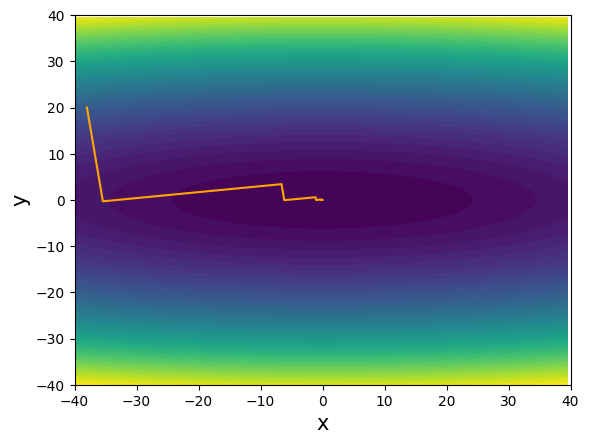

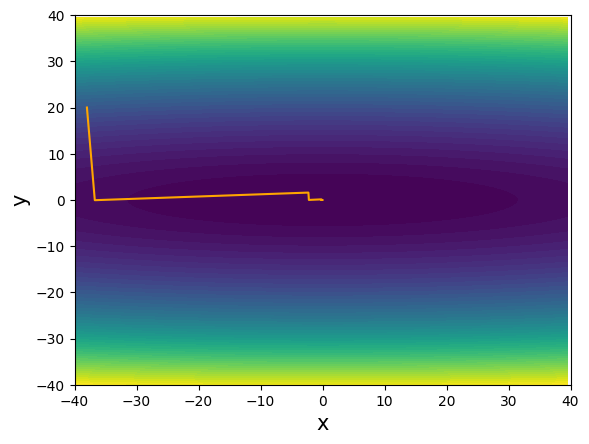

In [ ]:
print("steepestDescentGolden")
print(steepestDescentGolden(f, start, D(0.001)))
print(steepestDescentGolden(f1, start, D(0.001)))
buildGraph(f, steepestDescentGoldenBuilder)
buildGraph(f1, steepestDescentGoldenBuilder)

Описание алгоритма: Выбрав направление с помощью градиента, берем срез функции в координатах y(x) и находим на нем точку минимума с помощью метода золотого сечения, это и будет точкой отсчета для следующей итерации.

#### Метод сопряженных градиентов:

In [ ]:
def conjugateGradient(f, a, e):
    isWorking = True
    counter = 0
    p = -getGrad(f, a)
    grad = p
    f_a = f(a)
    while isWorking:
        counter += 1
        inner_f = lambda x: f(a + p * x)
        b = a + p * golden_ratio(inner_f, D(0), D(1e5), e)
        f_b = f(b)
        delta = sqrt(getDelta(b, a))
        if delta < e and math.fabs(f_b - f_a) < e:
            isWorking = False
        a = b.copy()
        f_a = f_b

        grad1 = -getGrad(f, a)
        if counter % 2 == 0:
            beta = 0
        else:
            beta = inner(grad1, grad1) / inner(grad, grad)
        p = grad1 + beta * p
        grad = grad1.copy()
    print(a, f(a), " conj")
    return counter

conjugateGradient
[Decimal('-0.0001839236602411865407757180019')
 Decimal('-3.463335348453438483360496E-7')] 2.255314133351719984507562409E-9  conj
5
[Decimal('-0.00004662163332881894080254932502')
 Decimal('2.515373802389338597469834E-7')] 2.175474825856565051038411323E-10  conj
7


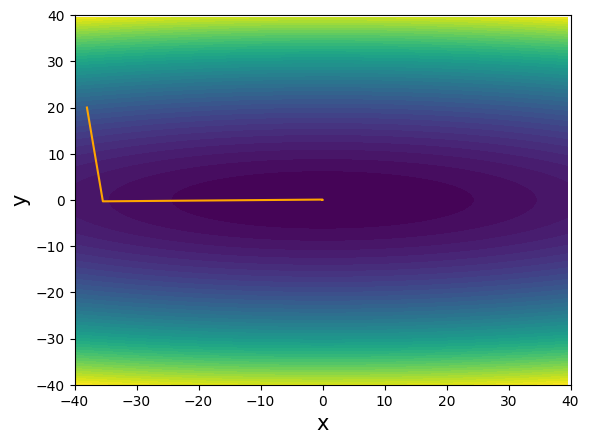

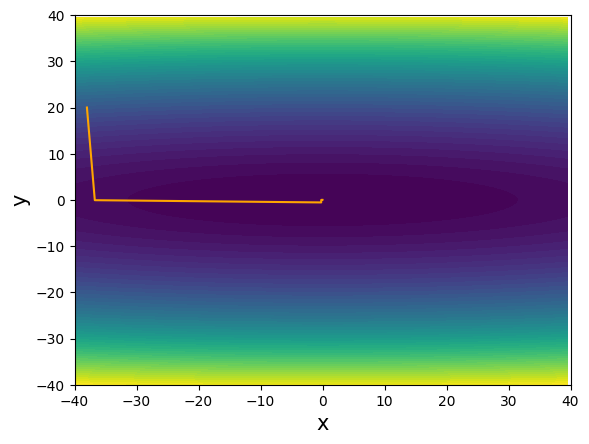

In [ ]:
print("conjugateGradient")
print(conjugateGradient(f, start, D(0.001)))
print(conjugateGradient(f1, start, D(0.001)))
buildGraph(f, conjugateGradientBuilder)
buildGraph(f1, conjugateGradientBuilder)

Описание алгоритма:
Вместо направления градиента выбирается направление p (изначально антиградиент). После совершения шага берется антиградиент в новой точке и обновляется значение $p: p = grad k + B * grad k – 1, B = \frac{(grad k – 1)^2}{(grad k)^2}. $ Раз в n шагов направление сбрасывается до антиградиента.

### Сравнения

#### Сравнение траекторий методов градиентного спуска и сопряженных градиентов:
Методы постоянного шага и дробления шага часто «прыгают» по разные стороны оврага. Методы сопряженного градиента и метод наискорейшего спуска имеют близкие траектории, однако метод сопряженного градиента выбирает направление чуть точнее, благодаря чему и быстрее сходится.

#### Эффективность
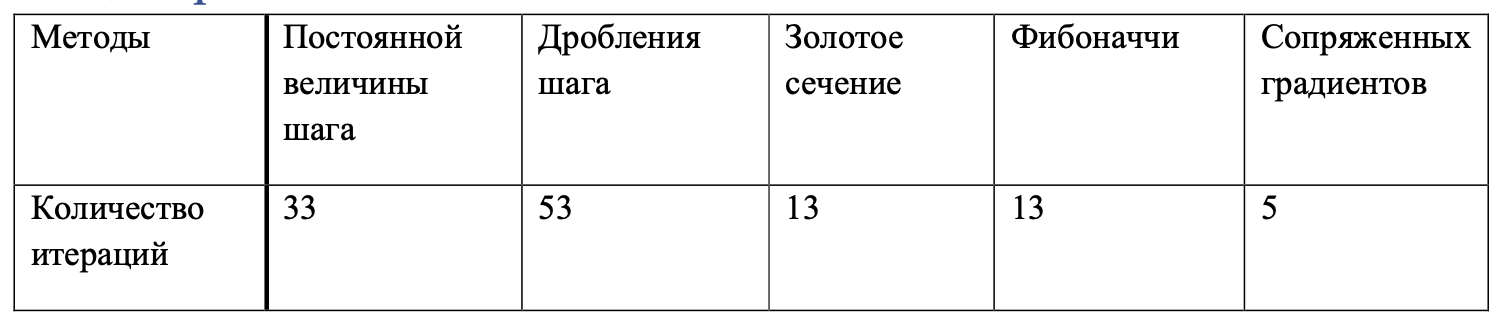

Реализуем генератор случайных квадратичных функций n переменных с числом обусловленности k:

Квадратичная функция: $f(x)=\frac{1}{2} x^T A x-b^T x$, где $A \in \mathbb{S}_{++}^n, b \in \mathbb{R}^n$.

 Число обусловленности:

 $\kappa=\left|\frac{\lambda_{\max }(A)}{\lambda_{\min} (A)}\right|\geq 1$.


 Будем генерировать матрицы $A$ и случайные векторы $b$ следующим способом.


$$
A=\operatorname{Diag}(a), \quad b \sim \mathcal{N}\left(0, I_n\right), \quad a_i= \begin{cases}1, & i=1 \\ \sim \operatorname{Unif}(1, \kappa), & 2 \leq i \leq n-1 \\ \kappa, & i=n\end{cases}
$$

Чтобы получить из полученной положительно определенной матрицы случайную, можно домножить каждую компоненту на (-1) с вероятностью 0.5.

Чтобы получить из полученной матрицы подобную ей недиагональную, можно перейти к случайному ортонормированному базису.



#### Графики с диагональной положительно определенной А

Метод постоянной величины шага

In [ ]:
import numpy as np
import matplotlib.pyplot

def g(k, n, mu, sigma, method):
  an = np.random.default_rng().uniform(1,k,n); an[0] = 1; an[n - 1] = k
  a = np.array([D(k) for k in an])
  bn = np.random.normal(mu, sigma, n); Ar = np.diag(a)
  b = np.array([D(k) for k in bn])
  func = lambda x: D(0.5)*( (x.T @ Ar) - D(2)*b.T) @ x
  x0 = np.random.normal(mu, sigma, n)
  start = np.array([D(k) for k in x0])
  res = method(func, start, D(0.001) )
  return res

g(7, 2, 0, 1, constStepDescent);
kmax , nmax = 30, 20
Table = np.zeros((kmax, nmax))
mu, sigma = 0, 1

for i in range(kmax):
  for j in range(nmax):
    Table[i, j] = g(i+1, j+1, mu, sigma, constStepDescent)

print(Table)


Выходные данные были обрезаны до нескольких последних строк (5000).
 Decimal('-0.04828912679890701517815785371')
 Decimal('1.603733434787481541308549024')
 Decimal('-0.07271625779411402628905387744')
 Decimal('0.1602606919997116514591922242')
 Decimal('0.05612761494030411426554343456')] -4.519812282273745247007280735 const step
[Decimal('-0.5734844647723073738184812615')
 Decimal('-0.2020905665032748109371166414')
 Decimal('-0.01556037468709754653683789269')
 Decimal('0.2243664307618573861352694379')
 Decimal('-0.07894473506236093573790823638')
 Decimal('-2.260409982173130510923873276')
 Decimal('0.2402783870009366217737458490')
 Decimal('-0.01036912158064747021200738445')
 Decimal('0.1562175551737041817796335380')
 Decimal('0.06077400401618970237749742091')
 Decimal('-0.1337541729208094120256449369')
 Decimal('-0.2540179311316171744085760676')
 Decimal('0.6003458585253920756194014413')
 Decimal('-0.05023895409385119054793104943')
 Decimal('0.07653903918749267436629785385')] -4.9126242

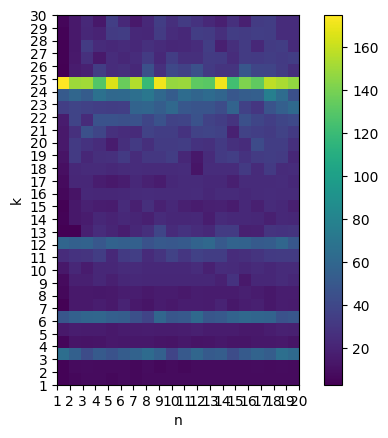

In [ ]:
import matplotlib.pyplot as plt

# задаем данные для графика
n_values = [k for k in range(1, nmax+1)]
k_values = [k for k in range(1, kmax+1)]

# создаем график
plt.imshow(Table, cmap='viridis', extent=[min(n_values), max(n_values), min(k_values), max(k_values)],
           origin='lower')
plt.colorbar()

# добавляем подписи осей
plt.xticks(n_values)
plt.yticks(k_values)
plt.xlabel('n')
plt.ylabel('k')

# отображаем график
plt.show()

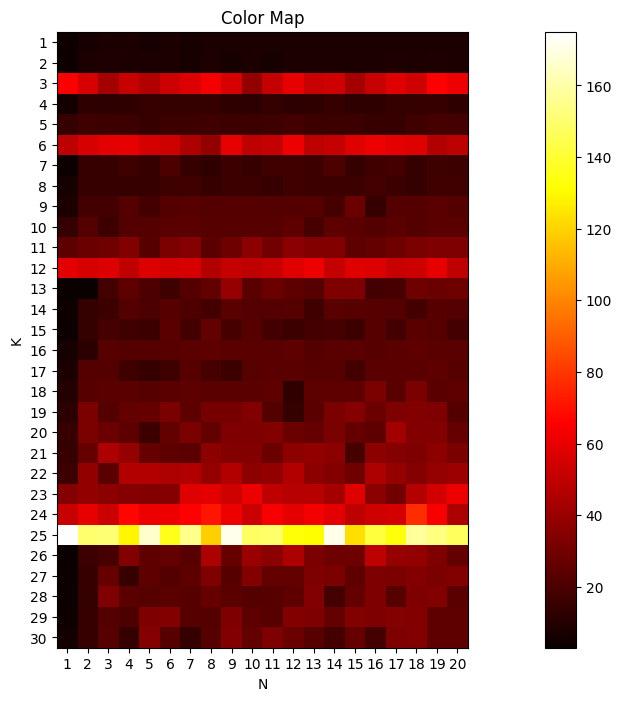

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

#Строим график
im = ax.imshow(Table, cmap='hot')

#Устанавливаем названия осей и заголовок
ax.set_xticks(np.arange(Table.shape[1]))
ax.set_yticks(np.arange(Table.shape[0]))
ax.set_xticklabels(np.arange(Table.shape[1])+1)
ax.set_yticklabels(np.arange(Table.shape[0])+1)
ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_title('Color Map')

#Добавляем цветовую шкалу
cbar = ax.figure.colorbar(im, ax=ax)

#Отображаем график
plt.show()

Метод дробления шага (условие Армихо).

In [ ]:
kmax , nmax = 30, 20
Table2 = np.zeros((kmax, nmax))
mu, sigma = 0, 1

for i in range(kmax):
  for j in range(nmax):
    Table2[i, j] = g(i+1, j+1, mu, sigma, splitStepDescent)

print(Table2)

Выходные данные были обрезаны до нескольких последних строк (5000).
 Decimal('0.1666103898522096866931886339')
 Decimal('0.01691157608326715887913292599')
 Decimal('0.2320784731723427800369158292')
 Decimal('0.08712697158180977866062312927')
 Decimal('0.05361526969606413442361456401')] -2.458316149758409893603309805 split step
[Decimal('1.291254432155031956411043835')
 Decimal('-0.04028937328787580658099949570')
 Decimal('-0.09087417431044372348749311065')
 Decimal('0.1223700209717038029557253041')
 Decimal('0.03974142340174856400565703491')
 Decimal('0.2782315831653569399046641103')
 Decimal('0.03090426817836960073868908360')
 Decimal('-0.03602899326075435544137428520')
 Decimal('-0.3692363617996290842628406903')
 Decimal('0.01533120376931578240337411781')
 Decimal('-0.08915560842989392568983104496')
 Decimal('-0.01331477419231614793759225851')
 Decimal('-0.05088223053355165680250133369')
 Decimal('0.1046349540394983398469151465')
 Decimal('-0.1820898836611197970602003713')] -1.458898

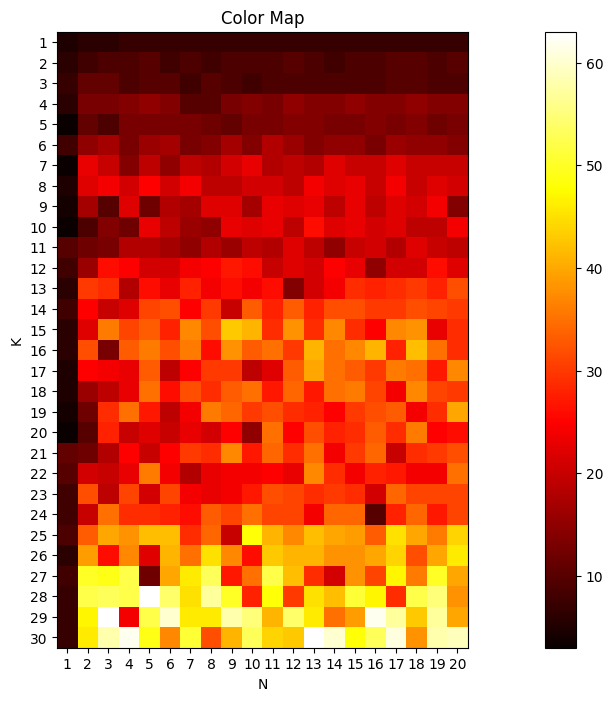

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

#Строим график
im = ax.imshow(Table2, cmap='hot')

#Устанавливаем названия осей и заголовок
ax.set_xticks(np.arange(Table2.shape[1]))
ax.set_yticks(np.arange(Table2.shape[0]))
ax.set_xticklabels(np.arange(Table2.shape[1])+1)
ax.set_yticklabels(np.arange(Table2.shape[0])+1)
ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_title('Color Map')

#Добавляем цветовую шкалу
cbar = ax.figure.colorbar(im, ax=ax)

#Отображаем график
plt.show()

#### Метод наискорейшего спуска (метод золотого сечения)

In [ ]:
kmax , nmax = 30, 20
Table3 = np.zeros((kmax, nmax))
mu, sigma = 0, 1

for i in range(kmax):
  for j in range(nmax):
    Table3[i, j] = g(i+1, j+1, mu, sigma, steepestDescentGolden)

print(Table3)

Выходные данные были обрезаны до нескольких последних строк (5000).
 Decimal('-0.06281794860134993931779497983')
 Decimal('-0.1288256584755421495436645560')
 Decimal('0.3188095995356354663480952102')
 Decimal('-0.002999165434600782784556023852')
 Decimal('0.05234762905306377558749553956')] -1.445293983943050368089696571  golden
[Decimal('-0.4031747796116679432906508550')
 Decimal('-0.3029998569830293790833268967')
 Decimal('0.1200658905080680670801330974')
 Decimal('-0.2903697136025557816967804322')
 Decimal('0.3872537473891507310728244942')
 Decimal('0.07003244616214788837199602240')
 Decimal('0.2743716126542783855088847771')
 Decimal('-0.1877295186284493551667327305')
 Decimal('0.1959667556073624194222131729')
 Decimal('0.4903002980167687219626214065')
 Decimal('-0.06624019899232726178412269731')
 Decimal('0.1839451414517918679503223185')
 Decimal('-0.1293940626973413408831486661')
 Decimal('0.5014059984518683410783667013')
 Decimal('0.1633066621964471480727100945')] -1.7739794466980

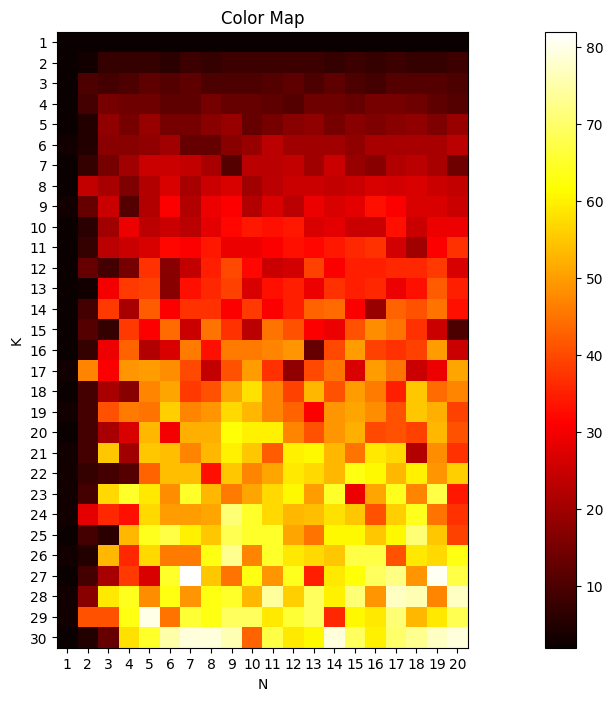

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

#Строим график
im = ax.imshow(Table3, cmap='hot')

#Устанавливаем названия осей и заголовок
ax.set_xticks(np.arange(Table3.shape[1]))
ax.set_yticks(np.arange(Table3.shape[0]))
ax.set_xticklabels(np.arange(Table3.shape[1])+1)
ax.set_yticklabels(np.arange(Table3.shape[0])+1)
ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_title('Color Map')

#Добавляем цветовую шкалу
cbar = ax.figure.colorbar(im, ax=ax)

#Отображаем график
plt.show()

In [ ]:
kmax , nmax = 30, 20
Table4 = np.zeros((kmax, nmax))
mu, sigma = 0, 1

for i in range(kmax):
  for j in range(nmax):
    Table4[i, j] = g(i+1, j+1, mu, sigma, conjugateGradient)

print(Table4)

Выходные данные были обрезаны до нескольких последних строк (5000).
 Decimal('-0.008465261873948022382246877612')
 Decimal('0.07677571661807029945409949103')
 Decimal('-0.09304620482283154596264080200')
 Decimal('0.3079570314533336356174846472')
 Decimal('0.1582804716798634901043269081')] -3.195728273996237889772753977  conj
[Decimal('1.434684841928119116350585142')
 Decimal('0.04787968901726950997665920863')
 Decimal('0.2726014667156858661698512844')
 Decimal('-0.2245686101262094703525757297')
 Decimal('-0.1984604025446138490224675721')
 Decimal('0.2726069206205636969992067771')
 Decimal('0.07396159003678659564899052693')
 Decimal('-0.01732491528002746295823142139')
 Decimal('-0.07163596844651188633064153012')
 Decimal('-0.08655258953358762750783632893')
 Decimal('-0.1835167124014191191270958384')
 Decimal('-0.2660413110936264061642457025')
 Decimal('-0.4408031545338546617547829044')
 Decimal('-0.007313023433491058481519841402')
 Decimal('-0.07466336146554068719366620260')] -1.9322469

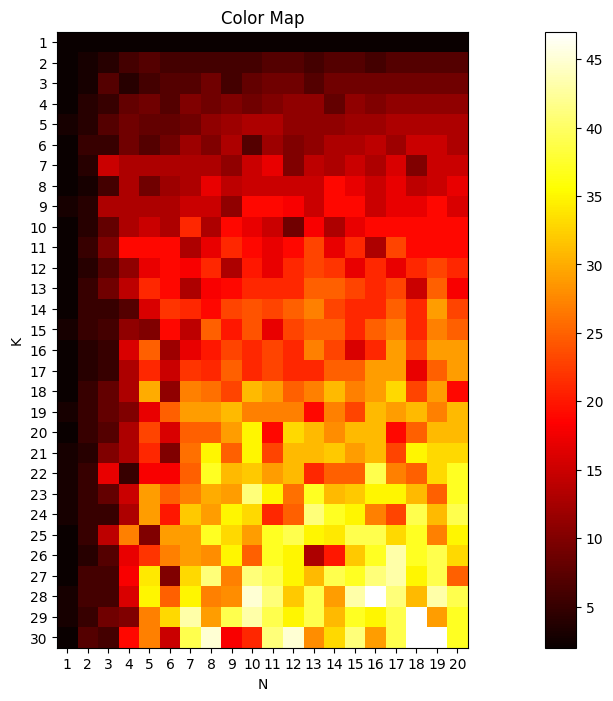

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

#Строим график
im = ax.imshow(Table4, cmap='hot')

#Устанавливаем названия осей и заголовок
ax.set_xticks(np.arange(Table4.shape[1]))
ax.set_yticks(np.arange(Table4.shape[0]))
ax.set_xticklabels(np.arange(Table4.shape[1])+1)
ax.set_yticklabels(np.arange(Table4.shape[0])+1)
ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_title('Color Map')

#Добавляем цветовую шкалу
cbar = ax.figure.colorbar(im, ax=ax)

#Отображаем график
plt.show()

### Вывод
В течение работы были реализованы методы оптимизации первого порядка, сравнили их скорости сходимости и траектории. Так же сравнили их с методом сопряженных градиентов. Метод сопряженных градиентов показал себя лучше всего. Число итераций линейно зависит от числа обусловленности и не зависит от размерности.